In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.models import load_model
import json
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
def read_data(file_name_json):
  '''
  file_name_json - path of json files for videos
  file_name_text -  path of text file where the key-point values are to stored
  '''
  test = []
  j=0
  json_files = glob.glob(file_name_json)
  #print(len(json_files))
  limit = len(json_files)-(len(json_files)%10)
  for jfile in json_files:
    if j < limit:
      j = j + 1
      with open(jfile) as f:
        data = json.load(f)
        if data['people']:
          kp= data['people'][0]['pose_keypoints_2d']
          kp = [kp[i] for i in range(0, 74) if (i+1) % 3 != 0]
          test.append(kp)
  x = int(len(test)/10)
  X_predict = np.asarray(test)
  print(X_predict.shape)
  ans = X_predict.shape[0]%10
  if X_predict.shape[0]%10 != 0:
    X_predict = X_predict[:-ans, :]
  print(X_predict.shape)
  test = test[: len(test) - ans]
  X_predict = X_predict.reshape(x, 10, 50)
  return X_predict, len(test)

In [3]:
##LOAD THE SAVED MODEL##
model = keras.models.load_model('/content/drive/My Drive/CSCE636/Model/Submission6/model_submit6_final.hdf5')

In [4]:
#PREDICT THE MODEL#
def predict(file_name_json):
  X_predict, num_frames = read_data(file_name_json)
  ypre = model.predict(X_predict)
  ypre=ypre.flatten()
  df = pd.DataFrame(ypre) 
  rolling = df.rolling(window=10)
  rolling_mean = rolling.mean()
  fps = 30
  x = np.linspace(0,num_frames/fps,num_frames)
  plt.figure(1)
  plt.plot(x, ypre)
  plt.axhline(y=0.5, color='r', linestyle='-')
  plt.ylabel('label')
  plt.xlabel('time in seconds')
  plt.legend(['Actual predicted data'], loc='best' )
  plt.ylim([0,1.2])
  plt.title('Prediction Output For Sample Videos')
  plt.show()

(180, 50)
(180, 50)


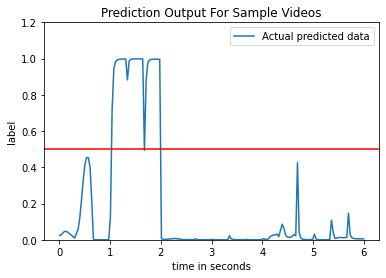

In [7]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial1/*'  #change json file for different test videos
predict(file_name_json)

(180, 50)
(180, 50)


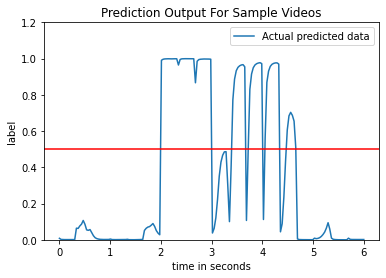

In [8]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial2/*'  #change json file for different test videos
predict(file_name_json)

(210, 50)
(210, 50)


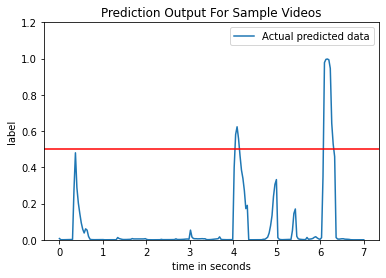

In [9]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial3/*'  #change json file for different test videos
predict(file_name_json)

(210, 50)
(210, 50)


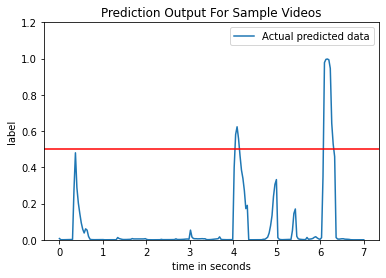

In [10]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial3/*'  #change json file for different test videos
predict(file_name_json)

(144, 50)
(140, 50)


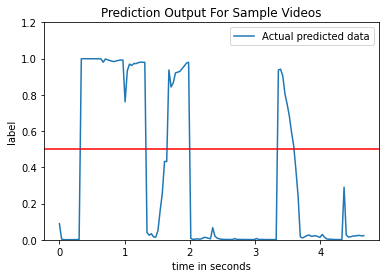

In [11]:
file_name_json = '/content/drive/My Drive/CSCE636/Test_Submission4/Trial4/*'  #change json file for different test videos
predict(file_name_json)

(250, 50)
(250, 50)


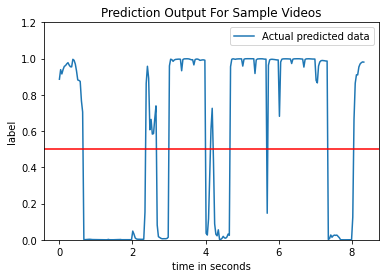

In [13]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial1/*'  #change json file for different test videos
predict(file_name_json)

(150, 50)
(150, 50)


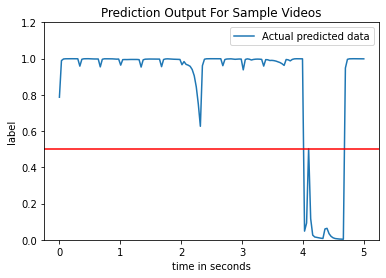

In [14]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial2/*'  #change json file for different test videos
predict(file_name_json)

(220, 50)
(220, 50)


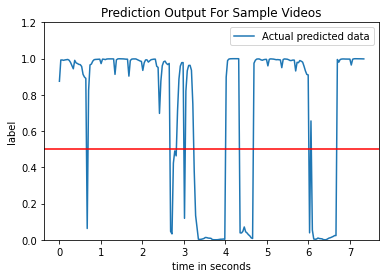

In [15]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial3/*'  #change json file for different test videos
predict(file_name_json)

(220, 50)
(220, 50)


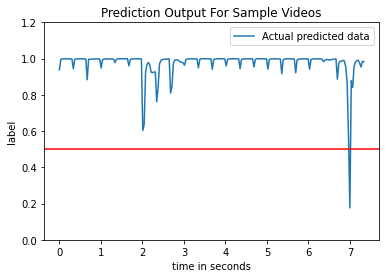

In [16]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial4/*'  #change json file for different test videos
predict(file_name_json)

(200, 50)
(200, 50)


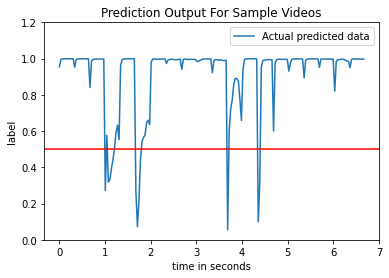

In [17]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial5/*'  #change json file for different test videos
predict(file_name_json)

(200, 50)
(200, 50)


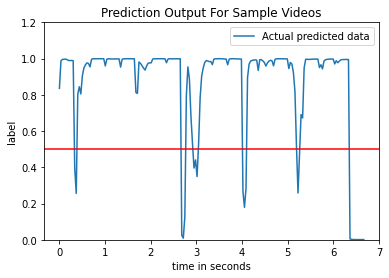

In [18]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial6/*'  #change json file for different test videos
predict(file_name_json)

(250, 50)
(250, 50)


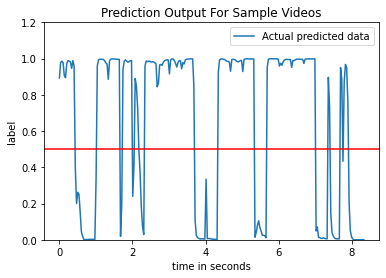

In [19]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial7/*'  #change json file for different test videos
predict(file_name_json)

(57, 50)
(50, 50)


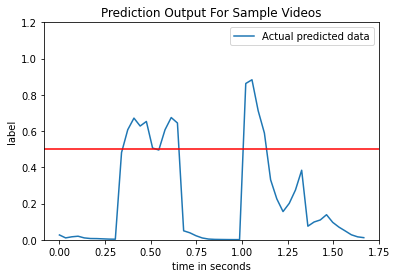

In [20]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial8/*'  #change json file for different test videos
predict(file_name_json)

(20, 50)
(20, 50)


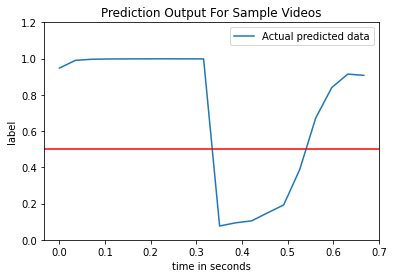

In [21]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial9/*'  #change json file for different test videos
predict(file_name_json)

(179, 50)
(170, 50)


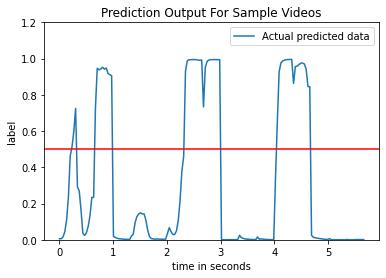

In [23]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial10/*'  #change json file for different test videos
predict(file_name_json)

(430, 50)
(430, 50)


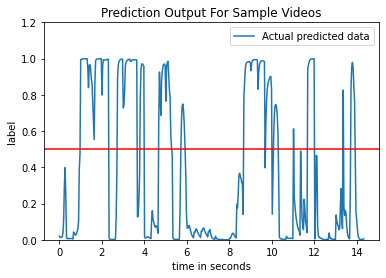

In [25]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial11/*'  #change json file for different test videos
predict(file_name_json)

(250, 50)
(250, 50)


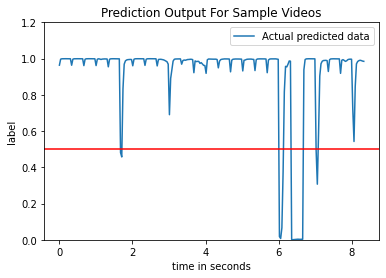

In [32]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial12/*'  #change json file for different test videos
predict(file_name_json)

(170, 50)
(170, 50)


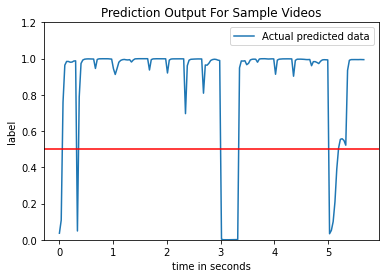

In [30]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial13/*'  #change json file for different test videos
predict(file_name_json)

(220, 50)
(220, 50)


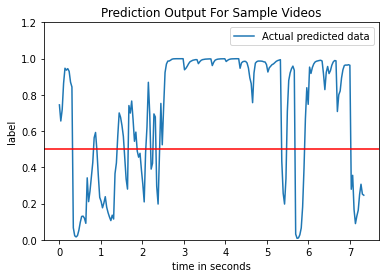

In [33]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial14/*'  #change json file for different test videos
predict(file_name_json)

(191, 50)
(190, 50)


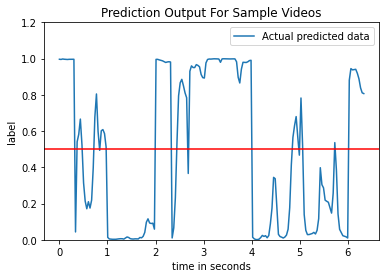

In [34]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial15/*'  #change json file for different test videos
predict(file_name_json)

(100, 50)
(100, 50)


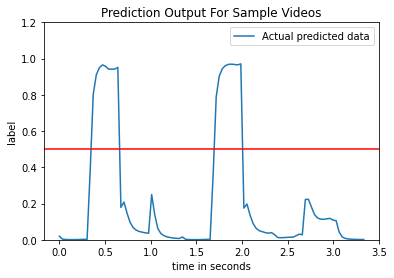

In [35]:
file_name_json = '/content/drive/My Drive/CSCE636/Trial_check_submission6/Trial16/*'  #change json file for different test videos
predict(file_name_json)